<a href="https://colab.research.google.com/github/julianisazam/UDEA-ai4eng-20251/blob/main/01%20-%20exploraci%C3%B3n.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PROYECTO KAGGLE

In [ ]:
!wget --no-cache -O init.py -q https://raw.githubusercontent.com/rramosp/ai4eng.v1/main/content/init.py
import init; init.init(force_download=False); init.get_weblink()

replicating local resources


# ABRIR DATASETS


Instalar librería para abrir datasets

In [ ]:
!pip install opendatasets
import opendatasets as od

Asignar a dataset_link el link de los datos que se desean importar

In [ ]:
dataset_link="https://www.kaggle.com/competitions/udea-ai-4-eng-20251-pruebas-saber-pro-colombia"
od.download(dataset_link)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: julianisazamarn
Your Kaggle Key: ··········
Extracting archive ./udea-ai-4-eng-20251-pruebas-saber-pro-colombia/udea-ai-4-eng-20251-pruebas-saber-pro-colombia.zip to ./udea-ai-4-eng-20251-pruebas-saber-pro-colombia


Copiar ruta donde se cargaron los archivos

In [ ]:
import os
os.chdir("udea-ai-4-eng-20251-pruebas-saber-pro-colombia")
os.listdir()

['test.csv', 'submission_example.csv', 'train.csv']

In [ ]:
import pandas as pd
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")


In [ ]:
test.shape

(296786, 20)

In [ ]:
test.head()

,ID,PERIODO,ESTU_PRGM_ACADEMICO,ESTU_PRGM_DEPARTAMENTO,ESTU_VALORMATRICULAUNIVERSIDAD,ESTU_HORASSEMANATRABAJA,FAMI_ESTRATOVIVIENDA,FAMI_TIENEINTERNET,FAMI_EDUCACIONPADRE,FAMI_TIENELAVADORA,FAMI_TIENEAUTOMOVIL,ESTU_PRIVADO_LIBERTAD,ESTU_PAGOMATRICULAPROPIO,FAMI_TIENECOMPUTADOR,FAMI_TIENEINTERNET.1,FAMI_EDUCACIONMADRE,coef_1,coef_2,coef_3,coef_4
0,550236,20183,TRABAJO SOCIAL,BOLIVAR,Menos de 500 mil,Menos de 10 horas,Estrato 3,Si,Técnica o tecnológica completa,Si,No,N,Si,Si,Si,Primaria completa,0.328,0.219,0.317,0.247
1,98545,20203,ADMINISTRACION COMERCIAL Y DE MERCADEO,ANTIOQUIA,Entre 2.5 millones y menos de 4 millones,Entre 21 y 30 horas,Estrato 2,Si,Secundaria (Bachillerato) completa,Si,No,N,No,Si,Si,Técnica o tecnológica completa,0.227,0.283,0.296,0.324
2,499179,20212,INGENIERIA MECATRONICA,BOGOTÁ,Entre 1 millón y menos de 2.5 millones,0,Estrato 3,Si,Secundaria (Bachillerato) incompleta,Si,No,N,No,Si,Si,Secundaria (Bachillerato) completa,0.285,0.228,0.294,0.247
3,782980,20195,CONTADURIA PUBLICA,SUCRE,Entre 1 millón y menos de 2.5 millones,Entre 21 y 30 horas,Estrato 1,No,Primaria incompleta,Si,No,N,No,No,No,Primaria incompleta,0.160,0.408,0.217,0.294
4,785185,20212,ADMINISTRACION DE EMPRESAS,ATLANTICO,Entre 2.5 millones y menos de 4 millones,Entre 11 y 20 horas,Estrato 2,Si,Secundaria (Bachillerato) completa,Si,No,N,No,Si,Si,Secundaria (Bachillerato) completa,0.209,0.283,0.306,0.286


# EXPLORACIÓN

# Distribución de las horas semanales trabajadas por estudiantes


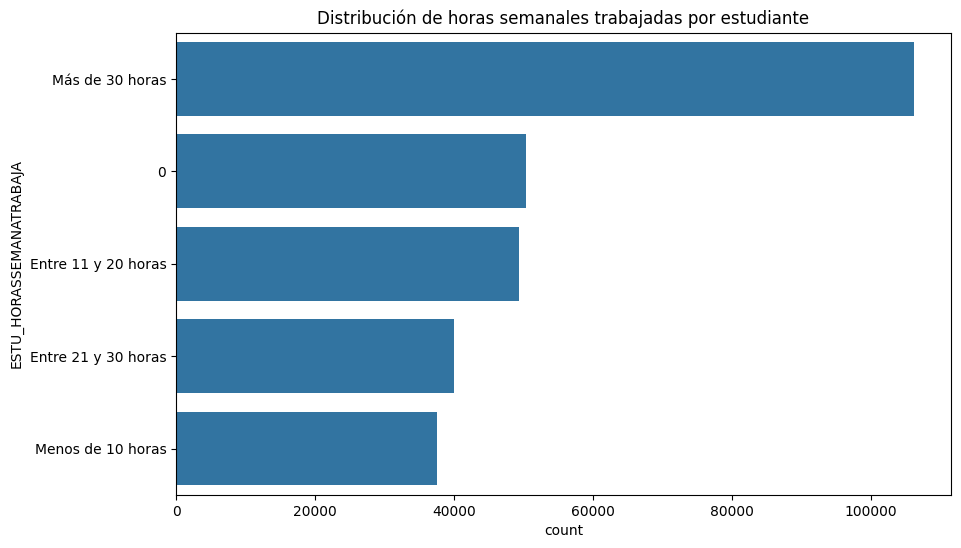

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


plt.figure(figsize=(10, 6))
sns.countplot(y='ESTU_HORASSEMANATRABAJA', data=test, order=test['ESTU_HORASSEMANATRABAJA'].value_counts().index)
plt.title('Distribución de horas semanales trabajadas por estudiante')
plt.show()

# Relación entre el nivel de estudio del padre y si la familia posee un automovil.

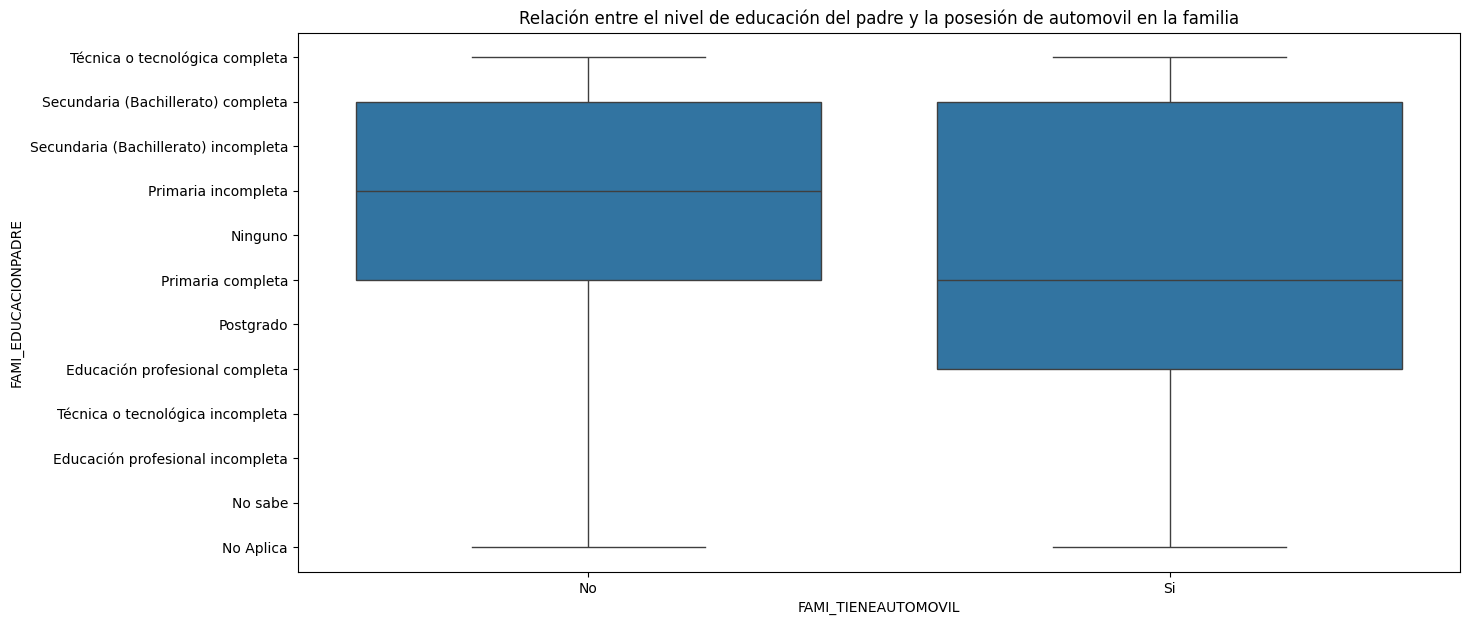

In [ ]:
plt.figure(figsize=(15, 7))
sns.boxplot(x='FAMI_TIENEAUTOMOVIL', y='FAMI_EDUCACIONPADRE', data=test)
plt.title('Relación entre el nivel de educación del padre y la posesión de automovil en la familia')
plt.show()

# Distribución de los departamentos a los que pertenecen los estudiantes

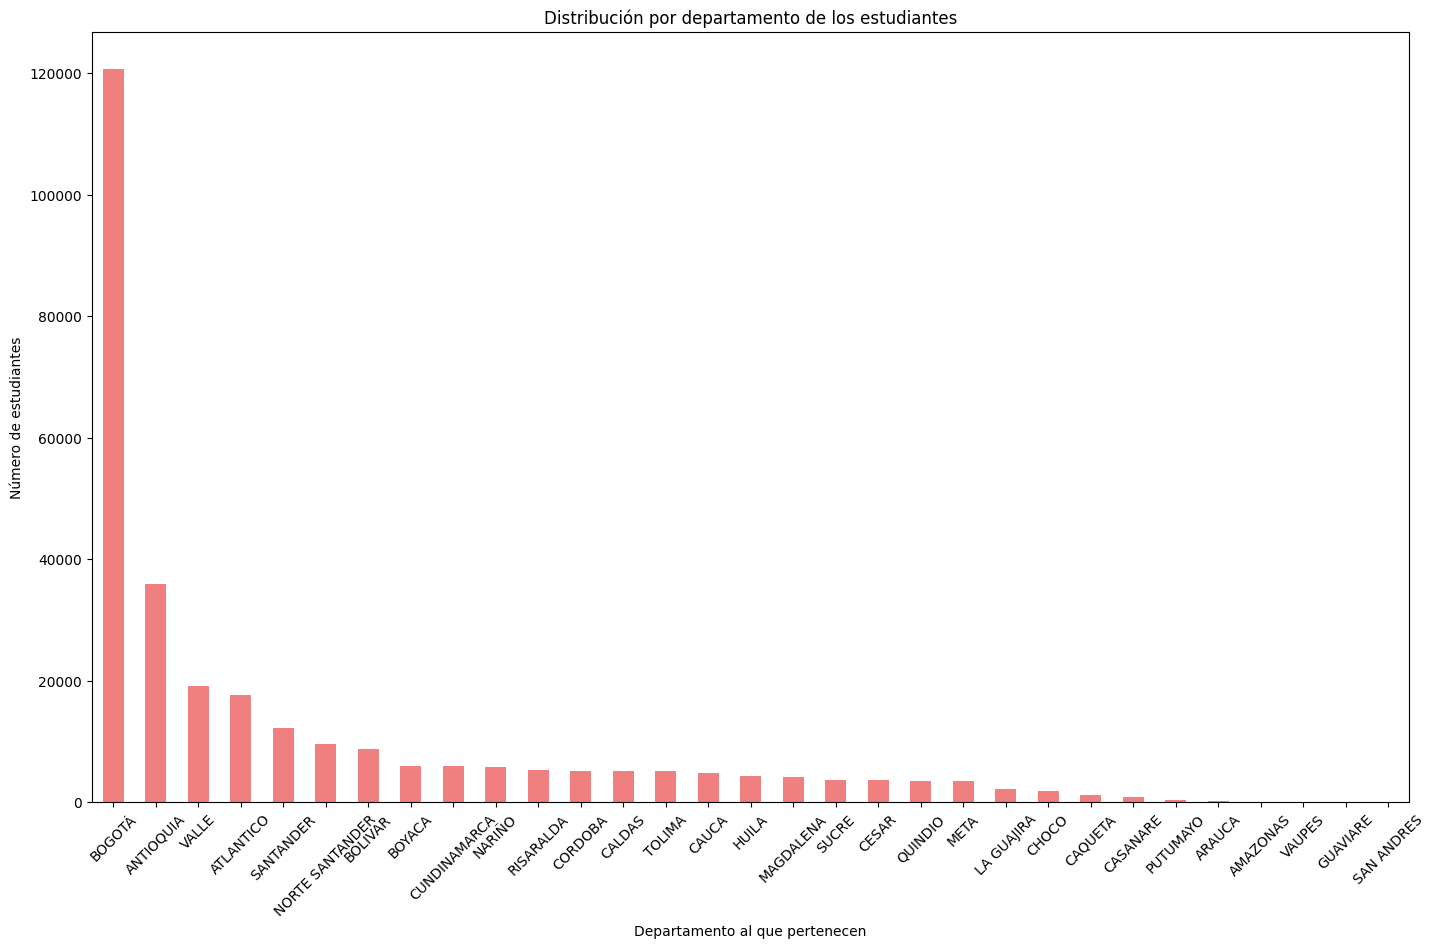

In [ ]:
departam_estudiante=test['ESTU_PRGM_DEPARTAMENTO'].value_counts()

plt.figure(figsize=(17,10))
departam_estudiante.plot(kind='bar', color='lightcoral')
plt.title('Distribución por departamento de los estudiantes')
plt.xlabel('Departamento al que pertenecen')
plt.ylabel('Número de estudiantes')
plt.xticks(rotation=45)
plt.show()
